In [64]:
import math
import kwant
from numpy import linspace,real,imag,array
import numpy as np
from matplotlib import pyplot as plt

sigma_h = np.array([[0., 0.], [0., -1]])
sigma_e = np.array([[1., 0.], [0., 0.]])
sigma_0 = np.array([[1., 0.], [0., 1.]])
sigma_x = np.array([[0., 1.], [1., 0.]])
sigma_y = np.array([[0., -1j], [1j, 0.]])
sigma_z = np.array([[1., 0.], [0., -1.]])

def make_model():

    ham =  """(-4+k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              -B*kron(sigma_z,sigma_z)
              -mu*kron(sigma_z,sigma_0)
              -delta*kron(sigma_y,sigma_y)
              +2*alpha*(kron(sigma_0,k_y*sigma_x)-kron(sigma_z,k_x*sigma_y))
           """   
    return kwant.continuum.discretize(ham)

def make_model_lead_L(): #No SOC or SC in the leads
    ham = """ (k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              +V/2*kron(sigma_z,sigma_0)"""
    return kwant.continuum.discretize(ham)
def make_model_lead_R(): #No SOC or SC in the leads
    ham = """ (k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              -V/2*kron(sigma_z,sigma_0)"""
    return kwant.continuum.discretize(ham)

def make_model_lead_L_alpha(): #Leads with SOC and SC to plot band structure
    ham = """(-4+k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              -B*kron(sigma_z,sigma_z)
              -mu*kron(sigma_z,sigma_0)
              -delta*kron(sigma_y,sigma_y)
              +2*alpha*(kron(sigma_0,k_y*sigma_x)-kron(sigma_z,k_x*sigma_y))
              +V/2*kron(sigma_z,sigma_0)"""
    return kwant.continuum.discretize(ham)
def make_model_lead_R_alpha(): #Leads with SOC and SC to plot band structure
    ham = """(-4+k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              -B*kron(sigma_z,sigma_z)
              -mu*kron(sigma_z,sigma_0)
              -delta*kron(sigma_y,sigma_y)
              +2*alpha*(kron(sigma_0,k_y*sigma_x)-kron(sigma_z,k_x*sigma_y))
              -V/2*kron(sigma_z,sigma_0)"""
    return kwant.continuum.discretize(ham)

def make_model_fm():
    ham =  """(-4+k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              -mu*kron(sigma_z,sigma_0)
              +J*kron(sigma_0,sigma_y)
           """   
    return kwant.continuum.discretize(ham)

def make_model_fm_lead():
    ham =  """(-4+k_x**2+k_y**2)*kron(sigma_z,sigma_0)
              -mu*kron(sigma_z,sigma_0)
              +J*kron(sigma_0,sigma_y)
              -mu2*kron(sigma_z,sigma_0)
           """   
    return kwant.continuum.discretize(ham)

template = make_model()
print(template)

# Discrete coordinates: x y

# Onsite element:
_cache_0 = (
array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]]))
_cache_1 = (
array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]]))
_cache_2 = (
array([[ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]))
def delta(site, B, delta, mu):
    return (B) * (_cache_0) + (mu) * (_cache_1) + (delta) * (_cache_2)

# Hopping from (1, 0):
_cache_0 = (
array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]]))
_cache_1 = (
array([[ 0.+0.j,  1.+0.j,  0.+0.j,

This is only a \\(\LaTeX\\) write up of make_model() above.

\\(\large{
H \quad = \left(-4 + k_x^2 + k_y^2\right)\left(\sigma_z\otimes\sigma_0\right)
    - h \left(\tau_z \otimes \sigma_z\right)
    - \mu \left(\tau_z\otimes\sigma_0\right)
    - \Delta\left(\tau_y\otimes\sigma_y\right)
    + 2\alpha\left(\tau_0\otimes\left(k_y\sigma_x\right) - \left(\tau_z \otimes k_x\sigma_y \right)\right) 
    \pm V/2 \left(\tau_z\otimes\sigma_0\right)}
\\)

\\(\large{
\qquad = 
\begin{pmatrix}
\epsilon_k -\mu - h \sigma_z + g_k \sigma & i \Delta \sigma_y \\
-i \Delta \sigma_y & -\epsilon_{-k} + \mu + h \sigma_z + g_k \sigma^* \\
\end{pmatrix}}
\\)

\\(\large{
\qquad= 
\begin{pmatrix}
-2t(\cos{k_x} + \cos{k_y}) - h - \mu & 2\alpha(\sin{k_y}+i\sin{k_x}) & 0 & \Delta \\
2\alpha(\sin{k_y}-i\sin{k_x}) & -2t(\cos{k_x} + \cos{k_y}) + h - \mu & -\Delta & 0 \\
0 & -\Delta & 2t(\cos{k_x} + \cos{k_y}) + h + \mu & 2\alpha(\sin{k_y}-i\sin{k_x}) \\
\Delta & 0 & 2\alpha(\sin{k_y}+i\sin{k_x}) & 2t(\cos{k_x} + \cos{k_y}) - h + \mu
\end{pmatrix}}
\\)

\\(\large{
H \quad = \left(-4 + k_x^2 + k_y^2\right)\left(\sigma_z\otimes\sigma_0\right)
    - \mu \left(\tau_z\otimes\sigma_0\right)
    + J\left(\tau_0\otimes\sigma_y\right)
    \pm V/2 \left(\tau_z\otimes\sigma_0\right)}
\\)

\\(\large{
\qquad = 
\begin{pmatrix}
\epsilon_k -\mu + J \sigma_y & 0 \\
0 & -\epsilon_{-k} + \mu - J \sigma_y^* (= +J \sigma_y)  \\
\end{pmatrix}}
\\)        

In [65]:
def make_sys(model,model_lead_L,model_lead_R,model_bilayer,model_bilayer_lead,cells=15,L=10,W=10,t=10):
    def lead_shape(site):
        x, y = site.pos 
        return abs(y)<W
    
    def lead_shape_fm(site):
        x, y = site.pos 
        return abs(x)<L

    def central_shape(site):
        x, y = site.pos 
        return abs(x)<L and abs(y)<W
    
    def bilayer(site):
        x, y = site.pos 
        return abs(x)<L and y>=W and y<W+t

    syst = kwant.Builder()
    syst.fill(model, central_shape, (0, 0))
    syst.fill(model_bilayer,bilayer, (0,W)) #Hopping between the shapes = model_fm

    lead1 = kwant.Builder(kwant.TranslationalSymmetry(model_lead_L.lattice.vec((-1, 0))))
    lead1.fill(model_lead_L, lead_shape, (-L, 0))

    lead2 = kwant.Builder(kwant.TranslationalSymmetry(model_lead_L.lattice.vec((+1, 0))))
    lead2.fill(model_lead_R, lead_shape, (+L, 0))
    
    lead3 = kwant.Builder(kwant.TranslationalSymmetry(model_lead_L.lattice.vec((0, +1))))
    lead3.fill(model_bilayer_lead, lead_shape_fm, (0, W+t))
    
    sites_L=syst.attach_lead(lead1,add_cells=cells)    
    sites_R=syst.attach_lead(lead2,add_cells=cells)
    sites_U=syst.attach_lead(lead3,add_cells=3*cells)
    
    return syst,sites_L,sites_R,sites_U,L,W,t,cells

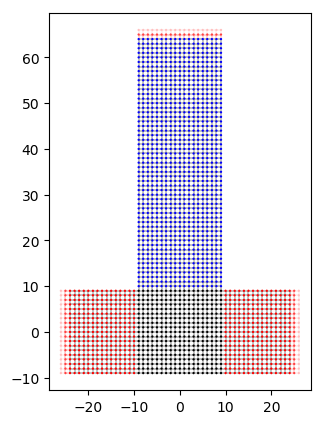

In [66]:
model = make_model()
model_lead_L= make_model_lead_L_alpha()
model_lead_R= make_model_lead_R_alpha()
model_bilayer = make_model_fm()
model_bilayer_lead = make_model_fm_lead()
sys,sites_L,sites_R,sites_U,L,W,t,cells = make_sys(model,model_lead_L,model_lead_R,model_bilayer,model_bilayer_lead)
syst=sys.finalized()

def layer_color(site):
        x, y = site.pos
        if abs(x)<L and abs(y)<W:
            return 'black'
        elif abs(x)<L and y>=W:
            return 'blue'
        elif abs(x)>=L and abs(y)<W:
            return "red"
        else:
            return "green"

kwant.plot(sys,fig_size=(10,5),site_color=layer_color,dpi=100);

In [67]:
#Interface FM
print(sys[model.lattice(0,W-2),model.lattice(0,W-1)])
print(sys[model.lattice(0,W-1),model.lattice(0,W)])
print(sys[model.lattice(0,W),model.lattice(0,W+1)])

<function alpha at 0x2b0f95bff620>
[[(-1+0j) 0j 0j 0j]
 [0j (-1+0j) 0j 0j]
 [0j 0j (1+0j) 0j]
 [0j 0j 0j (1+0j)]]
[[(-1+0j) 0j 0j 0j]
 [0j (-1+0j) 0j 0j]
 [0j 0j (1+0j) 0j]
 [0j 0j 0j (1+0j)]]


In [75]:
from cycler import cycler  #conda install cycler
import matplotlib.ticker as tck
import ipywidgets as wg
from IPython.display import display

momenta = np.linspace(-np.pi/2,np.pi/2,300)

def plotting(mu,mu2,delta,B,alpha,V,J):
    
    fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False,figsize=(15,7.5))
    #fig, ax1 = plt.subplots(1, 1,figsize=(10,5))
    params=dict(delta=delta,mu=mu,mu2=mu2,B=B,alpha=alpha,V=V,J=J)
    
    kwant.plotter.bands(syst.leads[0],params=params,momenta=momenta,ax=ax1)
    ax1.set_xlabel('$k$',fontsize=25)
    ax1.set_xticks([-np.pi/2, -0.25*np.pi, 0., .25*np.pi, np.pi/2])
    ax1.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$",r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])
    ax1.set_ylabel('$E$',fontsize=25)
    ax1.set_ylim([-1,1])
    ax1.set_yticks([-1,-.5, 0, 0.5,1])
    ax1.yaxis.tick_right()
    ax1.yaxis.set_ticks_position('left')
    ax1.tick_params(axis='both', which='major', labelsize=25,labelright='off',labelleft='on')
    ax1.set_title('Band structure TSC',fontsize=25)
    
    kwant.plotter.bands(syst.leads[2],params=params,momenta=momenta,ax=ax2)
    ax2.set_xlabel('$k$',fontsize=25)
    ax2.set_ylim([-1,1])
    ax2.set_yticks([-1,-.5, 0, 0.5,1])
    ax2.yaxis.tick_right()
    ax2.yaxis.set_ticks_position('right')
    ax2.tick_params(axis='both', which='major', labelsize=25,labelright='on',labelleft='off')
    ax2.set_xticks([-np.pi/2, -0.25*np.pi, 0., .25*np.pi, np.pi/2])
    ax2.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$",r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])
    ax2.tick_params(axis='both', which='major', labelsize=25)
    ax2.set_title('Band structure FM',fontsize=25)
    fig.subplots_adjust(wspace=0.1)
    
    ax2.axhline(y=0.2,color="k",linestyle="--");
    ax1.axhline(y=0.2,color="k",linestyle="--");
    #plt.axhline(y=-2,color="k",linestyle="--");
    #plt.axhline(y=2,color="k",linestyle="--");
    
    plt.show()
    
mu_slide=wg.FloatSlider(value=-4,min=-5, max=5,step=.05)
mu2_slide=wg.FloatSlider(value=0,min=-5, max=5,step=.05)
delta_slide=wg.FloatSlider(value=0.5,min=-1, max=1,step=.05)
B_slide=wg.FloatSlider(value=0.8,min=-2, max=2,step=.05)
alpha_slide=wg.FloatSlider(value=0.5,min=-1, max=1,step=.05)
V_slide=wg.FloatSlider(value=0,min=-1, max=1,step=.05)
J_slide=wg.FloatSlider(value=0,min=-1, max=1,step=.01)

wg.interact(plotting,manual_name='Plot',mu=mu_slide,mu2=mu2_slide,delta=delta_slide,B=B_slide,alpha=alpha_slide,V=V_slide,J=J_slide);

interactive(children=(FloatSlider(value=-4.0, description='mu', max=5.0, min=-5.0, step=0.05), FloatSlider(value=0.0, description='mu2', max=5.0, min=-5.0, step=0.05), FloatSlider(value=0.5, description='delta', max=1.0, min=-1.0, step=0.05), FloatSlider(value=0.8, description='B', max=2.0, min=-2.0, step=0.05), FloatSlider(value=0.5, description='alpha', max=1.0, min=-1.0, step=0.05), FloatSlider(value=0.0, description='V', max=1.0, min=-1.0, step=0.05), FloatSlider(value=0.0, description='J', max=1.0, min=-1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [96]:
params = {'delta': [0.5], 'mu': [-4.0], 'B': [0.8], 'alpha': [0.5], 'V': [0.0], 'J': [0.17]}
bands = kwant.physics.Bands(syst.leads[0],params=params)
np.sort(bands(np.pi/9))

array([-5.00757248, -4.96852567, -4.89935415, -4.7964148 , -4.65741605,
       -4.48194173, -4.27147366, -4.02926388, -3.76028112, -3.47187284,
       -3.2432129 , -3.18956558, -3.10929977, -2.97589061, -2.83058489,
       -2.73956252, -2.51868346, -2.46528522, -2.21379227, -2.1660256 ,
       -1.93262837, -1.85707412, -1.69238708, -1.57295846, -1.48816722,
       -1.43110384, -1.37429952, -1.2170712 , -0.93705482, -0.69106494,
       -0.53676394, -0.51771835, -0.50512516, -0.49241898, -0.46290047,
       -0.434172  , -0.41749197, -0.19655912,  0.19655912,  0.41749197,
        0.434172  ,  0.46290047,  0.49241898,  0.50512516,  0.51771835,
        0.53676394,  0.69106494,  0.93705482,  1.2170712 ,  1.37429952,
        1.43110384,  1.48816722,  1.57295846,  1.69238708,  1.85707412,
        1.93262837,  2.1660256 ,  2.21379227,  2.46528522,  2.51868346,
        2.73956252,  2.83058489,  2.97589061,  3.10929977,  3.18956558,
        3.2432129 ,  3.47187284,  3.76028112,  4.02926388,  4.27

In [70]:
#Parameters
listofsites = [site for site in syst.sites]
numsites = len(listofsites)
listsites = [site.pos for site in syst.sites]

dx = 15

width = int(2*W+t-2+3*cells) #-2 for > instead of >=

In [71]:
##Operators and functions

#Operator
sz = kwant.operator.Density(syst, np.kron(sigma_z,sigma_z))
sy = kwant.operator.Density(syst, np.kron(sigma_z,sigma_y))
sx = kwant.operator.Density(syst, np.kron(sigma_z,sigma_x))
sz_e = kwant.operator.Density(syst, np.kron(sigma_e,sigma_z))
sz_h = kwant.operator.Density(syst, np.kron(sigma_h,sigma_z))
sy_e = kwant.operator.Density(syst, np.kron(sigma_e,sigma_y))
sy_h = kwant.operator.Density(syst, np.kron(sigma_h,sigma_y))
sx_e = kwant.operator.Density(syst, np.kron(sigma_e,sigma_x))
sx_h = kwant.operator.Density(syst, np.kron(sigma_h,sigma_x))
q = kwant.operator.Density(syst, np.kron(sigma_z,sigma_0))
q_e = kwant.operator.Density(syst, np.kron(sigma_e,sigma_0))
q_h = kwant.operator.Density(syst, np.kron(sigma_h,sigma_0))  

def summing_modes(wf, numsites):
    
    spin_y_e = np.zeros((wf.shape[0],numsites))
    spin_y_h = np.zeros((wf.shape[0],numsites))
    spin_x_e = np.zeros((wf.shape[0],numsites))
    spin_x_h = np.zeros((wf.shape[0],numsites))
    spin_z_e = np.zeros((wf.shape[0],numsites))
    spin_z_h = np.zeros((wf.shape[0],numsites))
    #charge = np.zeros((wf.shape[0],numsites))
    charge_e = np.zeros((wf.shape[0],numsites))
    charge_h = np.zeros((wf.shape[0],numsites))    
 
    for mode in range(wf.shape[0]):
        spin_z_e[mode] = sz_e(wf[mode])
        spin_z_h[mode] = sz_h(wf[mode])
        spin_y_e[mode] = sy_e(wf[mode])
        spin_y_h[mode] = sy_h(wf[mode])
        spin_x_e[mode] = sx_e(wf[mode])
        spin_x_h[mode] = sx_h(wf[mode])
        #charge[mode] = q(wf[mode])
        charge_e[mode] = q_e(wf[mode])
        charge_h[mode] = q_h(wf[mode])
   
    return np.sum(spin_z_e, axis=0), np.sum(spin_z_h, axis=0), np.sum(spin_y_e, axis=0), \
            np.sum(spin_y_h, axis=0), np.sum(spin_x_e, axis=0), np.sum(spin_x_h, axis=0),\
            np.sum(charge_e, axis=0), np.sum(charge_h, axis=0)

def calculating_energies(syst,fermi,dx,params,numsites):
    
    spin_z_e_lr = np.zeros((3,numsites))
    spin_z_h_lr = np.zeros((3,numsites))
    spin_y_e_lr = np.zeros((3,numsites))
    spin_y_h_lr = np.zeros((3,numsites))
    spin_x_e_lr = np.zeros((3,numsites))
    spin_x_h_lr = np.zeros((3,numsites))
    charge_e_lr = np.zeros((3,numsites))
    charge_h_lr = np.zeros((3,numsites))
    charge = np.empty((numsites))
    spin_z = np.empty((numsites))
    spin_y = np.empty((numsites))
    spin_x = np.empty((numsites))
    
    # Used energy range
    energy = fermi
    
    # to vary parameter: params=dict(paramter=parameter)
    #Left lead
    wave = kwant.wave_function(syst,energy,params=params)
    wf = wave(0)    
    spin_z_e_lr[0],spin_z_h_lr[0],spin_y_e_lr[0],spin_y_h_lr[0],spin_x_e_lr[0],spin_x_h_lr[0],charge_e_lr[0],charge_h_lr[0] \
        = summing_modes(wf, numsites)
        
    #Right lead
    wf = wave(1)    
    spin_z_e_lr[1],spin_z_h_lr[1],spin_y_e_lr[1],spin_y_h_lr[1],spin_x_e_lr[1],spin_x_h_lr[1],charge_e_lr[1],charge_h_lr[1] \
        = summing_modes(wf, numsites)
        
    #Top lead
    wf = wave(2)
    spin_z_e_lr[2],spin_z_h_lr[2],spin_y_e_lr[2],spin_y_h_lr[2],spin_x_e_lr[2],spin_x_h_lr[2],charge_e_lr[2],charge_h_lr[2] \
        = summing_modes(wf, numsites)
    
    spin_z_e = spin_z_e_lr[::3]+spin_z_h_lr[1::3]+spin_z_e_lr[2::3]
    spin_z_h = spin_z_h_lr[::3]+spin_z_h_lr[1::3]+spin_z_h_lr[2::3]
    spin_z = spin_z_e + spin_z_h
    spin_y_e = spin_y_e_lr[::3]+spin_y_e_lr[1::3]+spin_y_e_lr[2::3]
    spin_y_h = spin_y_h_lr[::3]+spin_y_h_lr[1::3]+spin_y_h_lr[2::3]
    spin_y = spin_y_e + spin_y_h
    spin_x_e = spin_x_e_lr[::3]+spin_x_e_lr[1::3]+spin_x_e_lr[2::3]
    spin_x_h = spin_x_h_lr[::3]+spin_x_h_lr[1::3]+spin_x_h_lr[2::3]
    spin_x = spin_x_e + spin_x_h
    charge_e = charge_e_lr[::3]+charge_e_lr[1::3]+charge_e_lr[2::3]
    charge_h = charge_h_lr[::3]+charge_h_lr[1::3]+charge_h_lr[2::3]
    charge = charge_e + charge_h
    
    return spin_z[0], spin_z_e[0], spin_z_h[0], spin_y[0], spin_y_e[0], spin_y_h[0], \
            spin_x[0], spin_x_e[0], spin_x_h[0], charge[0], charge_e[0], charge_h[0]

def plot_bands(lead,params):
    usedlead = syst.leads[lead]
    print("Band structure lead"+str(lead))
    # to vary parameter: params=dict(paramter=parameter)
    kwant.plotter.bands(usedlead, fig_size=(10,5),params=params)

def plot_density(syst,array,string):
    print(str(string))
    kwant.plotter.map(syst, np.nan_to_num(array), fig_size=(10,5), method="cubic")

def save_density(syst,array,string,folder):
    np.save("results"+str(folder)+"/"+str(string), array)

def minimal_energy(syst,lead,params):
    return np.min(kwant.physics.Bands(syst.leads[lead],params=params)(0))

#Not working
def plot_line(syst,array,L,W,color):
    cutline = [lat(L/2,i) for i in range (W)]
    plt.plot([array[syst.id_by_site[x]] for x in cutline],color, figsize=(10,5))

#Not working
def potential(sys,site,V,B,delta,mu,J):
    potential_function=sys[site]
    print(potential_function)
    if syst.id_by_site[site]<580:
        return real(sys[site](site=site,V=V)[0,0])
    if syst.id_by_site[site]>=580 and syst.id_by_site[site]<1421:
        return real(sys[site](site=site,B=B,delta=delta,mu=mu,J=J)[0,0])
    if syst.id_by_site[site]>=1421:
        return real(sys[site](site=site,V=V)[0,0])

In [76]:
import os

def output_function(job_args, folder, dx=15, numsites=numsites):
    
    delta,mu,mu2,alpha,B,V,fermi,J = job_args
    
    name = "delta="+str(delta)+", mu2="+str(mu2)+", alpha="+str(alpha)+", B="+str(B)+\
        ", V="+str(V)+", fermi="+str(fermi)+", J="+str(J)
    
    params=dict(delta=delta,mu=mu,mu2=mu2,B=B,alpha=alpha,V=V,J=J)
    
    if not os.path.exists("results"+str(folder)):
        os.makedirs("results"+str(folder))        
       
    if os.path.isfile("results"+str(folder)+"/spin y "+str(name)+".npy"): # returns whether the file exists or not
        print(str(name)+" already exists")
        file = np.load("results"+str(folder)+"/spin y "+str(name)+".npy")
        if np.size(file) == 1:
            spin_z, spin_z_e, spin_z_h, spin_y, spin_y_e, spin_y_h, \
                spin_x, spin_x_e, spin_x_h, charge, charge_e, charge_h \
                = calculating_energies(syst,fermi,dx,params,numsites)
            try:
                save_density(syst,spin_z,"spin z "+str(name),folder)
                save_density(syst,spin_z_e,"spin z e "+str(name),folder)
                save_density(syst,spin_z_h,"spin z h "+str(name),folder)
                save_density(syst,spin_y,"spin y "+str(name),folder)
                save_density(syst,spin_y_e,"spin y e "+str(name),folder)
                save_density(syst,spin_y_h,"spin y h "+str(name),folder)
                save_density(syst,spin_x,"spin x "+str(name),folder)
                save_density(syst,spin_x_e,"spin x e "+str(name),folder)
                save_density(syst,spin_x_h,"spin x h "+str(name),folder)
                save_density(syst,charge,"charge "+str(name),folder)
                save_density(syst,charge_e,"charge e "+str(name),folder)
                save_density(syst,charge_h,"charge h "+str(name),folder)
            except:
                print("not saved")
            finally:
                print(str("corrected "+name))   
        else:
            if len(file) == 1:
                file1 = file[0]
                np.save("results"+str(folder)+"/spin z "+str(name)+".npy",file1)
                file = np.load("results"+str(folder)+"/spin z e "+str(name)+".npy")
                file1 = file[0]
                np.save("results"+str(folder)+"/spin z e "+str(name)+".npy",file1)
                file = np.load("results"+str(folder)+"/spin z h "+str(name)+".npy")
                file1 = file[0]
                np.save("results"+str(folder)+"/spin z h "+str(name)+".npy",file1)
                file = np.load("results"+str(folder)+"/charge "+str(name)+".npy")
                file1 = file[0]
                np.save("results"+str(folder)+"/charge "+str(name)+".npy",file1)
                file = np.load("results"+str(folder)+"/charge e "+str(name)+".npy")
                file1 = file[0]
                np.save("results"+str(folder)+"/charge e "+str(name)+".npy",file1)
                file = np.load("results"+str(folder)+"/charge h "+str(name)+".npy")
                file1 = file[0]
                np.save("results"+str(folder)+"/charge h "+str(name)+".npy",file1)
                print(str(name)+" overwritten")
    else:
        spin_z, spin_z_e, spin_z_h, spin_y, spin_y_e, spin_y_h, \
            spin_x, spin_x_e, spin_x_h, charge, charge_e, charge_h \
            = calculating_energies(syst,fermi,dx,params,numsites)
        try:
            save_density(syst,spin_z,"spin z "+str(name),folder)
            save_density(syst,spin_z_e,"spin z e "+str(name),folder)
            save_density(syst,spin_z_h,"spin z h "+str(name),folder)
            save_density(syst,spin_y,"spin y "+str(name),folder)
            save_density(syst,spin_y_e,"spin y e "+str(name),folder)
            save_density(syst,spin_y_h,"spin y h "+str(name),folder)
            save_density(syst,spin_x,"spin x "+str(name),folder)
            save_density(syst,spin_x_e,"spin x e "+str(name),folder)
            save_density(syst,spin_x_h,"spin x h "+str(name),folder)
            save_density(syst,charge,"charge "+str(name),folder)
            save_density(syst,charge_e,"charge e "+str(name),folder)
            save_density(syst,charge_h,"charge h "+str(name),folder)
        except:
            print("not saved")
#         finally:
#             print(str(name))

In [98]:
import time
import itertools

start_time = time.time()

delta = [0.5]
mu = [-4]
mu2 = [0.6]
alpha = [0.5]
B = [0.8]
V = [0.0]
J = [0.0]
fermi = [0.2]

folder = 43

job_args = np.array(list(itertools.product(delta, mu, mu2, alpha, B, V, fermi,J)))

for i in range(len(job_args)):
    output_function(job_args[i],folder)

print("--- %s seconds ---" % (time.time() - start_time));

delta=0.5, mu2=0.6, alpha=0.5, B=0.8, V=0.0, fermi=0.2, J=0.0 already exists
--- 0.0015194416046142578 seconds ---


In [97]:
import os
from IPython.display import Image, display

def plot_sumline(folder,text,delta,mu,mu2,alpha,B,V,fermi,J,width,tracing):
    
    nullpoint = listsites.index([-L+1, -W+1]) #(-L+1,-W+1), lower left corner
    
    string = "delta="+str(delta)+", mu2="+str(mu2)+", alpha="+str(alpha)+", B="+str(B)+", V="+str(V)+", fermi="+str(fermi)+", J="+str(J)+".npy"

    if os.path.isfile("results"+str(folder)+"/spin z "+string) == False:
        
        job_args = np.array(list(itertools.product([delta], [mu], [mu2], [alpha], [B], [V], [fermi],[J])))

        for i in range(len(job_args)):
            output_function(job_args[i],folder);
    
    fig = plt.figure(figsize=(12,6))
    plt.plot([],[],'w',label='Sum over L(FM) along x-Axis')
    if type(text)==str:
        plotfile = np.zeros(width+1)
        results = np.load("results"+str(folder)+"/"+text+" "+string)

        for w in range(width+1):
            for l in range(L):
                plotfile[w] = plotfile[w]+results[nullpoint+w+l*(width+1)]
        plt.plot(range(-W,width-W+1),plotfile,label=text)
    if type(text)==list:
        for i,k in enumerate(text):
            plotfile = np.zeros(width+1)
            results = np.load("results"+str(folder)+"/"+k+" "+string)

            for w in range(width+1):
                for l in range(L):
                    plotfile[w] = plotfile[w]+results[nullpoint+w+l*(width+1)]
            plt.plot(range(-W,width-W+1),plotfile,label=k)
    plt.axvline(x=W-1+0.5,color="k",linestyle="--",alpha=0.25)
    plt.legend(fontsize=14)
    plt.show()

def fig_show(plotfolder,text,delta,mu,alpha,B,V,fermi,J):
    
    string = "delta="+str(delta)+", mu="+str(mu)+", alpha="+str(alpha)+", B="+str(B)+", V="+str(V)+", fermi="+str(fermi)+", J="+str(J)+".npy"
    
    display(Image(filename="plots"+str(plotsfolder)+"/"+str(text)+" "+string))

def fig_plot(folder,text,delta,mu,mu2,alpha,B,V,fermi,J,vmin,vmax):
    
    string = "delta="+str(delta)+", mu2="+str(mu2)+", alpha="+str(alpha)+", B="+str(B)+", V="+str(V)+", fermi="+str(fermi)+", J="+str(J)+".npy"
    
    if os.path.isfile("results"+str(folder)+"/spin z "+string) == False:
        
        job_args = np.array(list(itertools.product([delta], [mu], [mu2], [alpha], [B], [V], [fermi],[J])))

        for i in range(len(job_args)):
            output_function(job_args[i],folder);
    
    if type(text)==str:
        results = np.load("results"+str(folder)+"/"+text+" "+string)
    if type(text)==list:
        results = np.load("results"+str(folder)+"/"+str(text[0])+" "+string)

    kwant.plotter.map(syst, np.nan_to_num(results), fig_size=(15,7.5), method="cubic", vmin=float(vmin), vmax=float(vmax))

def plot_line(folder,text,delta,mu,alpha,B,V,fermi,J,width,tracing):
    
    string = "delta="+str(delta)+", mu="+str(mu)+", alpha="+str(alpha)+", B="+str(B)+", V="+str(V)+", fermi="+str(fermi)+", J="+str(J)+".npy"
    
    nullpoint = listsites.index([0, -W+1]) #(0,-W+1), lower middlepoint
    
    plt.figure(figsize=(12,6))
    plt.plot([],[],'w',label='Line at (0,y)')
    if type(text)==str:
        results = np.load("results"+str(folder)+"/"+text+" "+string)
        if tracing == "no":
            plt.plot(range(width+1),[results[site] for site in range(nullpoint,nullpoint+width+1)],label=text)
        if tracing == "yes":
            ram = np.load("ram.npy")
            if len(ram) == 0:
                ram = results
                plt.plot(range(width+1),[results[site] for site in range(nullpoint,nullpoint+width+1)])
            else:
                ram = np.vstack((ram,results))
                for i in ram:
                    plt.plot(range(width+1),[i[site] for site in range(nullpoint,nullpoint+width+1)])
            np.save("ram",ram)
    if type(text)==list:
        for i,k in enumerate(text):
            results = np.load("results"+str(folder)+"/"+str(k)+" "+string)
            plt.plot(range(width+1),[results[site] for site in range(nullpoint,nullpoint+width+1)],label=k)
    plt.axvline(x=2*W-1+0.5,color="k",linestyle="--",alpha=0.25)
    plt.legend(fontsize=14)
    plt.show()

In [90]:
folder = 43

In [95]:
# UI Output

ram = []
np.save("ram",ram)

from ipywidgets import HBox, VBox
 
def change_value(b):
    if b.assign == "vmin":
        vmin.value = str(np.round(float(vmin.value) + float(b.description),2))
    if b.assign == "vmax":
        vmax.value = str(np.round(float(vmax.value) + float(b.description),2))

def reset_axis(b):
    
    if type(quantity.value) == str:
        quantityvalue = quantity.value
    elif type(quantity.value) == list:
        quantityvalue = quantity.value[0]
    
    if choose.value == "top":
    
        file = np.load("results"+str(number_slide_bottom.value)+"/"+str(quantityvalue)+" delta="+str(delta_slide.value)+", mu2="+\
               str(mu2_slide.value)+", alpha="+str(alpha_slide.value)+", B="+str(B_slide.value)\
               +", V="+str(V_slide.value)+", fermi="+str(fermi_slide.value)+", J="+str(J_slide.value)+".npy")
        
    if choose.value == "bottom":
        
        file = np.load("results"+str(number_slide_bottom.value)+"/"+str(quantityvalue)+" delta="+str(delta_slide.value)+", mu2="+\
               str(mu2_slide.value)+", alpha="+str(alpha_slide.value)+", B="+str(B_slide.value)\
               +", V="+str(V_slide.value)+", fermi="+str(fermi_slide.value)+", J="+str(J_slide.value)+".npy")
    
    vmin.value = str(np.round(np.amin(file),1)-0.01)
    vmax.value = str(np.round(np.amax(file),1)+0.01)
   
        
def clear_ram(b):
    ram = []
    np.save("ram",ram)
    
    if tracing.value == 'yes':
        tracing.value = 'no'
        tracing.value = 'yes'

class ValueButton(wg.Button):
    def __init__(self, assign, *args, **kwargs):
        super(ValueButton, self).__init__(*args, **kwargs)
        self.assign = assign
        self.on_click(change_value)

## Controls

mu_slide=wg.FloatSlider(description=r'\(\mu\)',value=-4,min=-5, max=-3,step=1,continuous_update=False)
mu2_slide=wg.FloatSlider(description=r'\(\mu2\)',value=0.6,min=-1, max=1,step=0.01,continuous_update=False)
delta_slide=wg.SelectionSlider(description=r'\(\Delta\)',value=0.5,options=np.sort([0.0,0.5,0,0.25,0.75]),continuous_update=False)
alpha_slide=wg.SelectionSlider(description=r'\(\alpha\)',value=0.5,options=np.sort([0.0,0.1,0.2,0.3,0.4,0.5,0.75]),continuous_update=False)
B_slide=wg.SelectionSlider(description=r'\(h\)',value=0.8,options=np.sort([0,0.8,0.5,0.25,0.6,1]),continuous_update=False)
V_slide=wg.Select(options={'no bias': 0.0, 'linear': 0.1, 'nonlinear': 0.5},value=0.0,description=r'\(V\)',rows=2,continuous_update=False)
#V_slide=wg.FloatSlider(description=r'\(V\)',value=0,min=0, max=0.4,step=.4)
fermi_slide=wg.FloatSlider(description=r'\(E_F\)',value=0.2,min=-2, max=2,step=0.01,continuous_update=False)
J_slide=wg.SelectionSlider(description=r'\(J\)',value=0.0,options=np.linspace(-1,1,401),continuous_update=False)
width_slide=wg.SelectionSlider(description=r'\(J\)',value=width,options=[width,W,t],continuous_update=False)
quantity=wg.Dropdown(options={'spin z e':'spin z e','spin z h':'spin z h','spin z':'spin z','spin z e and h':['spin z','spin z e','spin z h'],'spin y e':'spin y e','spin y h':'spin y h'\
                              ,'spin y':'spin y','spin x e':'spin x e','spin x h':'spin x h','spin x':'spin x','charge e':'charge e','charge h':'charge h','charge':'charge'\
                              ,'charge e and h':['charge','charge e', 'charge h'],'spin z and x':['spin z','spin x']})

number_slide_bottom=wg.IntSlider(value=folder)

file = np.load("results"+str(number_slide_bottom.value)+"/"+str(quantity.value)+" delta="+str(delta_slide.value)+", mu2="+\
               str(mu2_slide.value)+", alpha="+str(alpha_slide.value)+", B="+str(B_slide.value)\
               +", V="+str(V_slide.value)+", fermi="+str(fermi_slide.value)+", J="+str(J_slide.value)+".npy")

vmin=wg.Text(str(np.round(np.amin(file),1)-0.01),description=r'\(v_{min}\)')
vmax=wg.Text(str(np.round(np.amax(file),1)+0.01),description=r'\(v_{max}\)')

vmin_plus = ValueButton(description="+0.01",assign="vmin")
vmin_minus = ValueButton(description="-0.01",assign="vmin")
vmax_plus = ValueButton(description="+0.01",assign="vmax")
vmax_minus = ValueButton(description="-0.01",assign="vmax")
vmin_plusplus = ValueButton(description="+0.1",assign="vmin")
vmin_minusminus = ValueButton(description="-0.1",assign="vmin")
vmax_plusplus = ValueButton(description="+0.1",assign="vmax")
vmax_minusminus = ValueButton(description="-0.1",assign="vmax")

resetter = wg.Button(description="Reset Axis")
choose = wg.ToggleButtons(value='bottom', options=['top', 'bottom'],description='Graph:',button_style='')
tracing = wg.ToggleButtons(value='no', options=['no', 'yes'],description='Tracing:',button_style='')
clear = wg.Button(description="Clear")

## Layout and Display

ui = VBox([HBox([quantity]),HBox([vmin_minusminus,vmin_minus,vmin,vmin_plus,vmin_plusplus]),\
           HBox([vmax_minusminus,vmax_minus,vmax,vmax_plus,vmax_plusplus]),HBox([choose,resetter]),\
           HBox([tracing,clear]),\
           HBox([VBox([fermi_slide, J_slide]),VBox([mu2_slide,B_slide]),VBox([delta_slide])])])

out1 = wg.interactive_output(fig_plot,{'folder': number_slide_bottom,'text': quantity,'mu': mu_slide, \
            'mu2': mu2_slide,'delta': delta_slide,'alpha': alpha_slide,'B': B_slide,'V': V_slide,'fermi': fermi_slide,'J': J_slide,'vmin': vmin,'vmax': vmax})

out = wg.interactive_output(plot_sumline,{'folder': number_slide_bottom,'text': quantity,'mu': mu_slide, \
            'mu2': mu2_slide,'delta': delta_slide,'alpha': alpha_slide,'B': B_slide,'V': V_slide,'fermi': fermi_slide,'J': J_slide,'width': width_slide, 'tracing': tracing})


display(ui, HBox([out1, out]))

## Button functions

resetter.on_click(reset_axis)
clear.on_click(clear_ram)

VBox(children=(HBox(children=(Dropdown(options={'spin z e': 'spin z e', 'spin z h': 'spin z h', 'spin z': 'spin z', 'spin z e and h': ['spin z', 'spin z e', 'spin z h'], 'spin y e': 'spin y e', 'spin y h': 'spin y h', 'spin y': 'spin y', 'spin x e': 'spin x e', 'spin x h': 'spin x h', 'spin x': 'spin x', 'charge e': 'charge e', 'charge h': 'charge h', 'charge': 'charge', 'charge e and h': ['charge', 'charge e', 'charge h'], 'spin z and x': ['spin z', 'spin x']}, value='spin z e'),)), HBox(children=(ValueButton(description='-0.1', style=ButtonStyle()), ValueButton(description='-0.01', style=ButtonStyle()), Text(value='-0.41', description='\\(v_{min}\\)'), ValueButton(description='+0.01', style=ButtonStyle()), ValueButton(description='+0.1', style=ButtonStyle()))), HBox(children=(ValueButton(description='-0.1', style=ButtonStyle()), ValueButton(description='-0.01', style=ButtonStyle()), Text(value='0.91', description='\\(v_{max}\\)'), ValueButton(description='+0.01', style=ButtonStyle()), ValueButton(description='+0.1', style=ButtonStyle()))), HBox(children=(ToggleButtons(description='Graph:', index=1, options=('top', 'bottom'), value='bottom'), Button(description='Reset Axis', style=ButtonStyle()))), HBox(children=(ToggleButtons(description='Tracing:', options=('no', 'yes'), value='no'), Button(description='Clear', style=ButtonStyle()))), HBox(children=(VBox(children=(FloatSlider(value=0.2, continuous_update=False, description='\\(E_F\\)', max=2.0, min=-2.0, step=0.01), SelectionSlider(continuous_update=False, description='\\(J\\)', index=200, options=(-1.0, -0.995, -0.98999999999999999, -0.98499999999999999, -0.97999999999999998, -0.97499999999999998, -0.96999999999999997, -0.96499999999999997, -0.95999999999999996, -0.95499999999999996, -0.94999999999999996, -0.94499999999999995, -0.93999999999999995, -0.93500000000000005, -0.92999999999999994, -0.92500000000000004, -0.92000000000000004, -0.91500000000000004, -0.91000000000000003, -0.90500000000000003, -0.90000000000000002, -0.89500000000000002, -0.89000000000000001, -0.88500000000000001, -0.88, -0.875, -0.87, -0.86499999999999999, -0.85999999999999999, -0.85499999999999998, -0.84999999999999998, -0.84499999999999997, -0.83999999999999997, -0.83499999999999996, -0.82999999999999996, -0.82499999999999996, -0.82000000000000006, -0.81499999999999995, -0.81000000000000005, -0.80499999999999994, -0.80000000000000004, -0.79499999999999993, -0.79000000000000004, -0.78500000000000003, -0.78000000000000003, -0.77500000000000002, -0.77000000000000002, -0.76500000000000001, -0.76000000000000001, -0.755, -0.75, -0.745, -0.73999999999999999, -0.73499999999999999, -0.72999999999999998, -0.72499999999999998, -0.71999999999999997, -0.71499999999999997, -0.70999999999999996, -0.70500000000000007, -0.69999999999999996, -0.69500000000000006, -0.68999999999999995, -0.68500000000000005, -0.67999999999999994, -0.67500000000000004, -0.66999999999999993, -0.66500000000000004, -0.65999999999999992, -0.65500000000000003, -0.64999999999999991, -0.64500000000000002, -0.64000000000000001, -0.63500000000000001, -0.63, -0.625, -0.62, -0.61499999999999999, -0.60999999999999999, -0.60499999999999998, -0.59999999999999998, -0.59499999999999997, -0.58999999999999997, -0.58499999999999996, -0.58000000000000007, -0.57499999999999996, -0.57000000000000006, -0.56499999999999995, -0.56000000000000005, -0.55499999999999994, -0.55000000000000004, -0.54499999999999993, -0.54000000000000004, -0.53499999999999992, -0.53000000000000003, -0.52499999999999991, -0.52000000000000002, -0.51500000000000001, -0.51000000000000001, -0.505, -0.5, -0.495, -0.48999999999999999, -0.48499999999999999, -0.47999999999999998, -0.47499999999999998, -0.46999999999999997, -0.46499999999999997, -0.45999999999999996, -0.45499999999999996, -0.44999999999999996, -0.44499999999999995, -0.43999999999999995, -0.43499999999999994, -0.42999999999999994, -0.42499999999999993, -0.42000000000000004, -0.41500000000000004, -0.41000000000000003, -0.405000

HBox(children=(Output(), Output()))

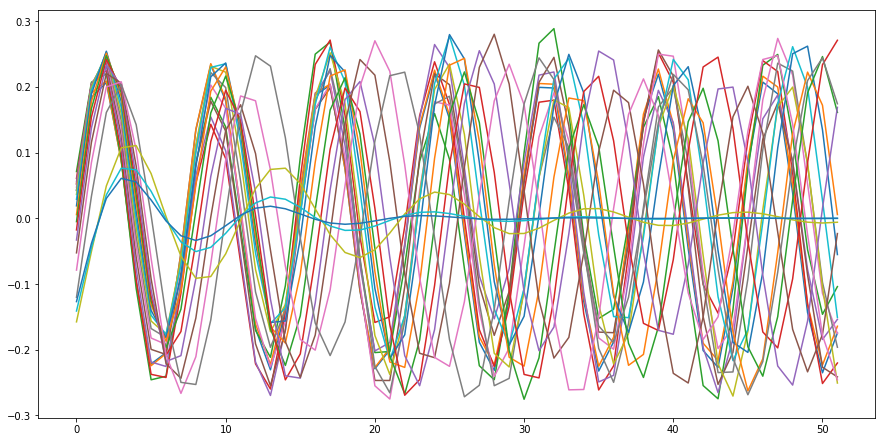

In [101]:
from scipy import optimize 

##Plot all lines for L = 10

delta = 0.5
mu = -4.0
alpha = 0.5
B = 0.8
V = 0.0
J = np.linspace(0.0,0.2,21)
fermi = 0.2

text = 'spin z'

folder = 40

nullpoint = listsites.index([0, -W+1]) #(-L+1,-W+1), lower left corner

fit_values = np.zeros((len(J),52))

fig = plt.figure(figsize=(15,7.5))
plt.plot([],[],'w',label='Line at (0,y)')
    
for j,JJ in enumerate(J):    
    
    string = "delta="+str(delta)+", mu="+str(mu)+", alpha="+str(alpha)+", B="+str(B)+", V="+str(V)+\
        ", fermi="+str(fermi)+", J="+str(JJ)+".npy"

    plotfile = np.zeros(width+1)
    results = np.load("results"+str(folder)+"/"+text+" "+string)

    plotfile = [results[site] for site in range(nullpoint,nullpoint+width+1)]
    
    plt.plot(plotfile[22::],label=JJ)
    
    fit_values[j] = plotfile[22::]
    
plt.show()

In [102]:
def fit_function(x,a,k,phi,b,kprime,phiprime,d):
    return a*np.cos(k*x+phi) + b/(x+d)+np.sin(kprime*x+phiprime)
def fit_functiona(x,a,k,phi,b,kprime,phiprime,d):
    return a*np.cos(k*x+phi)
def fit_functionaa(x,a,k,phi):
    return a*np.cos(k*x+phi)
def fit_functionb(x,a,k,phi,b,kprime,phiprime,d):
    return b/(x+d)*np.sin(kprime*x+phiprime)

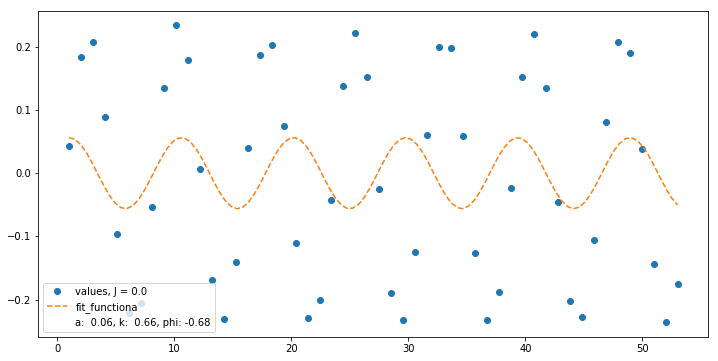

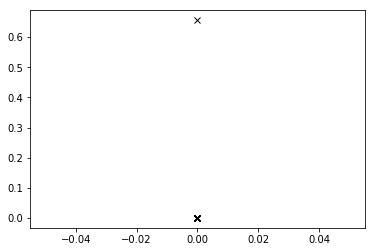

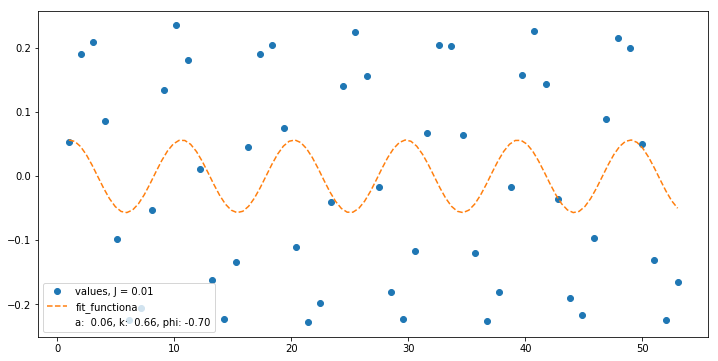

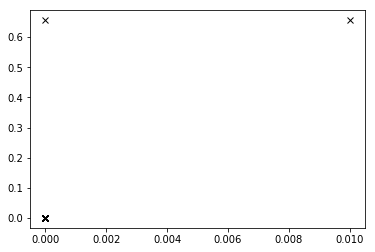

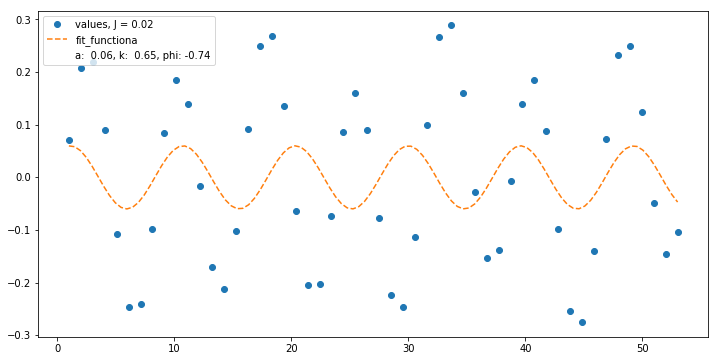

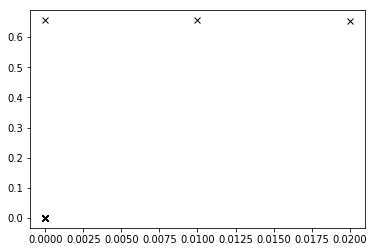

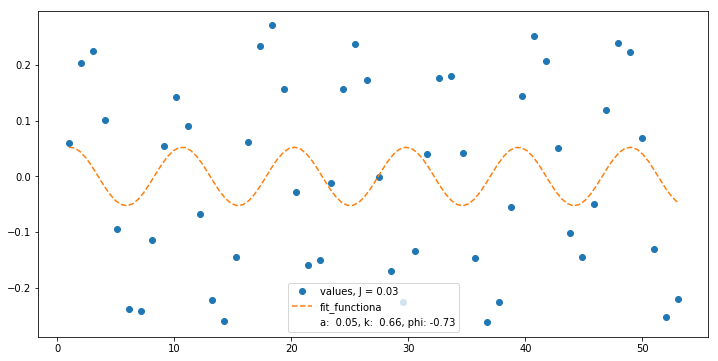

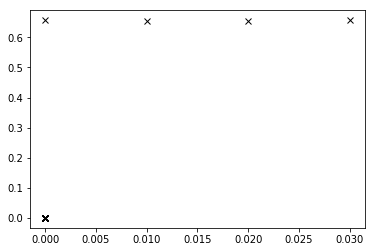

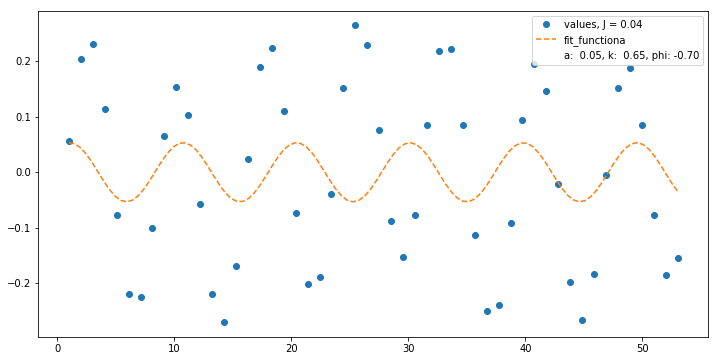

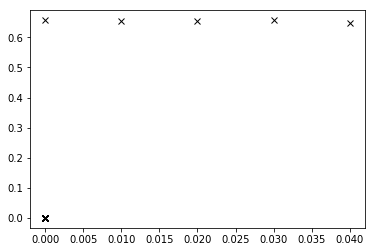

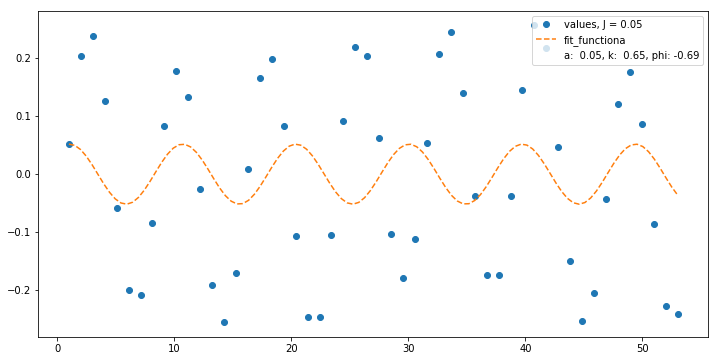

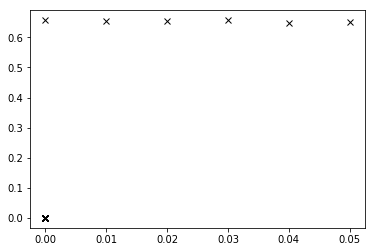

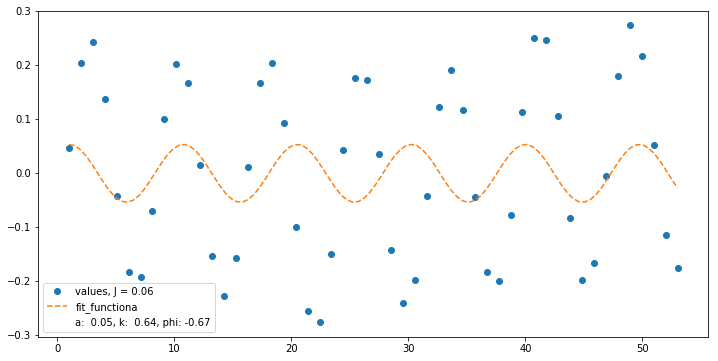

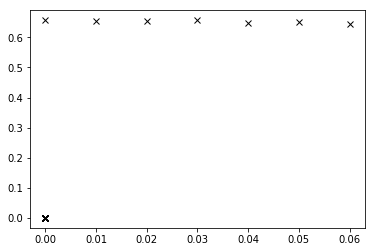

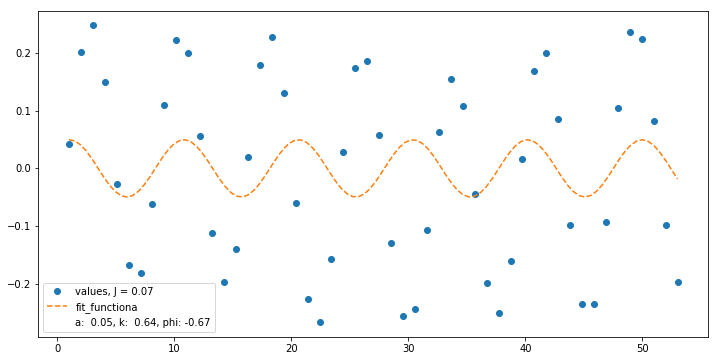

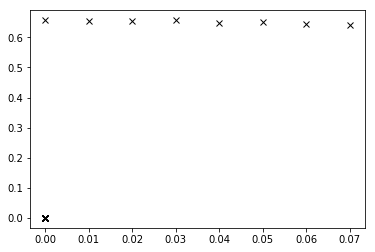

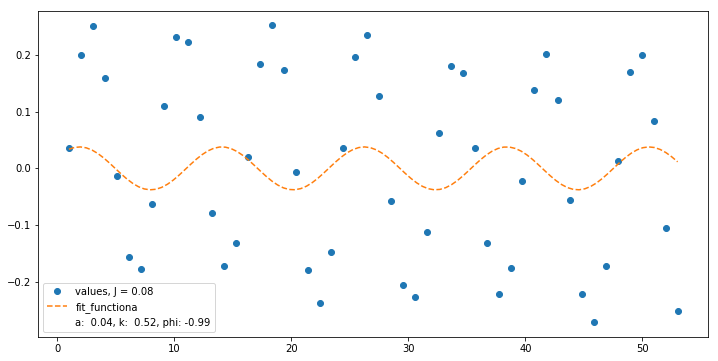

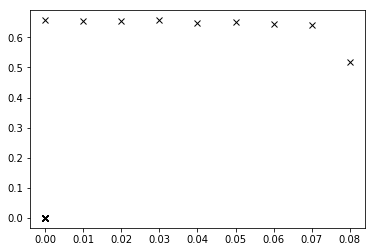

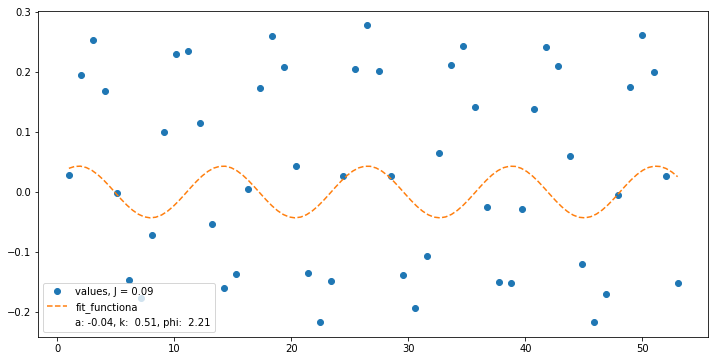

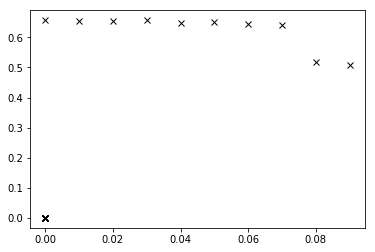

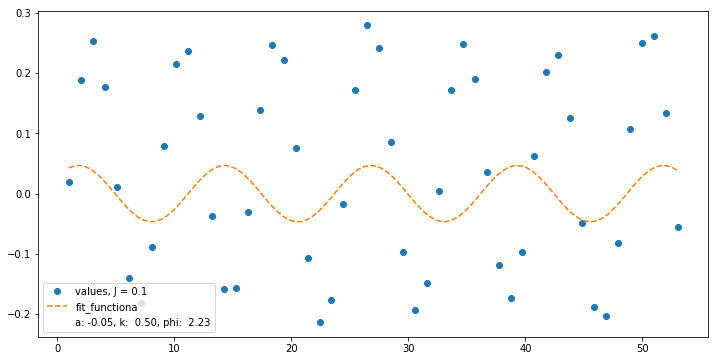

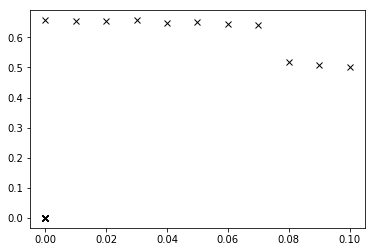

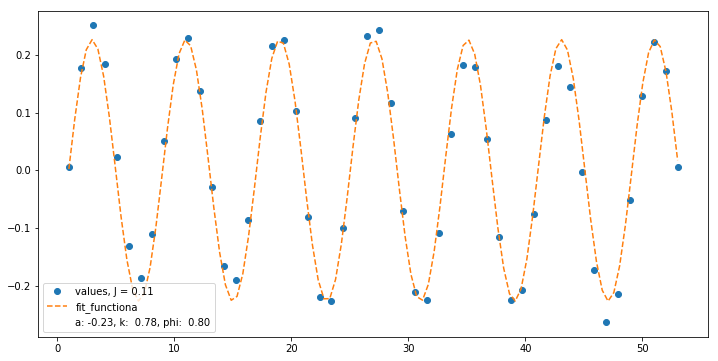

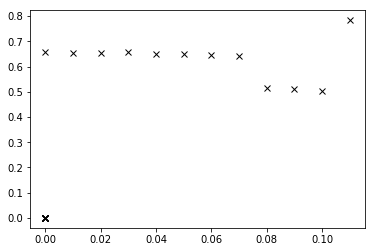

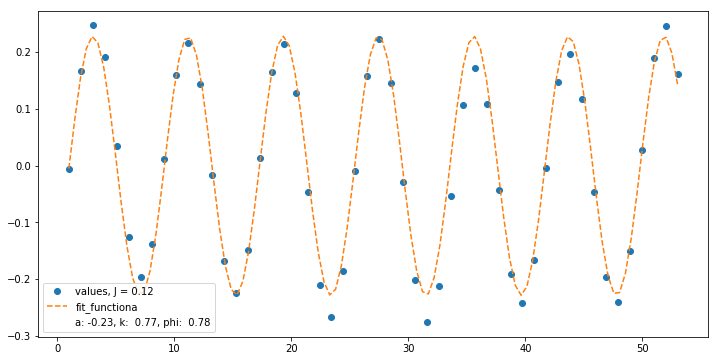

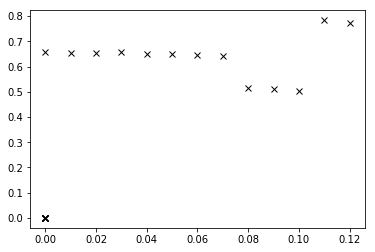

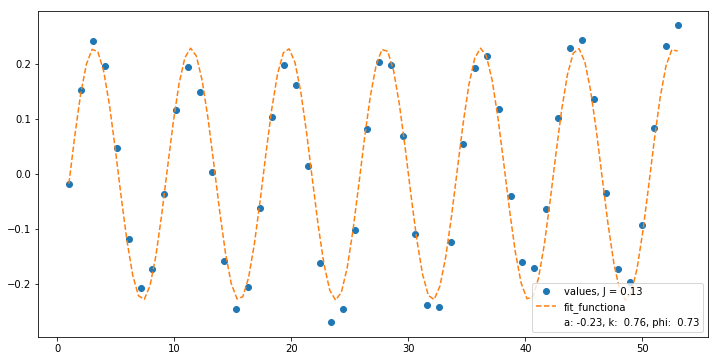

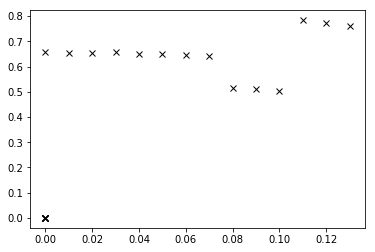

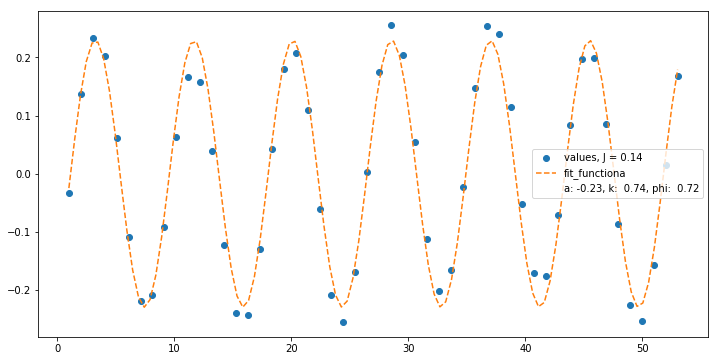

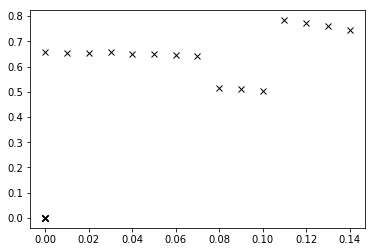

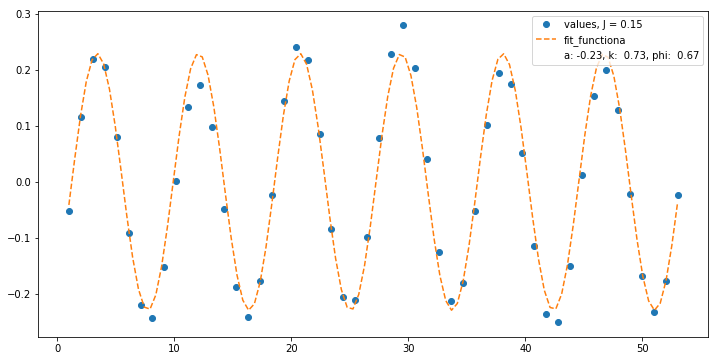

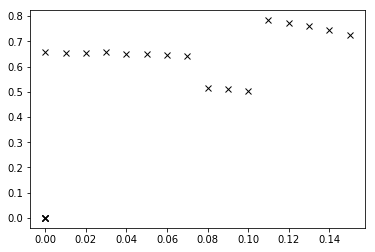

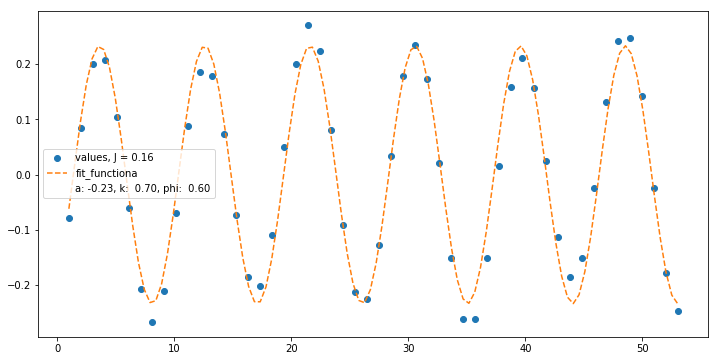

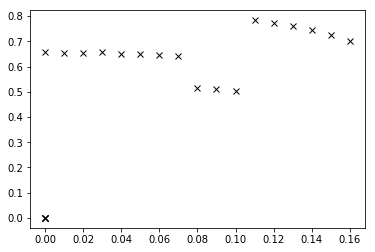

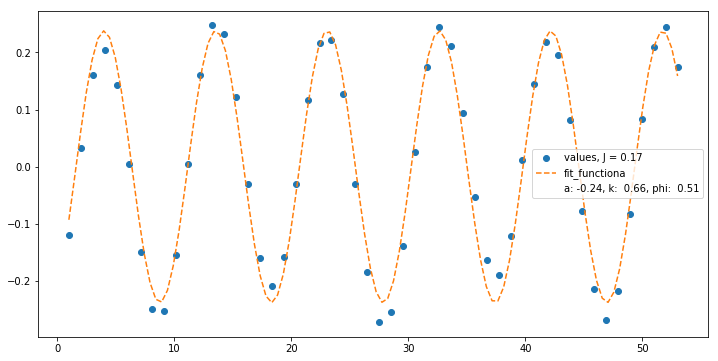

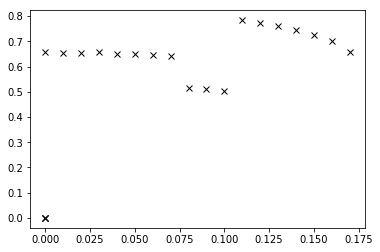

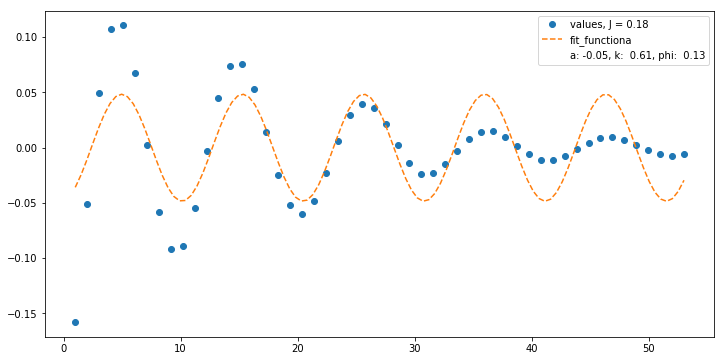

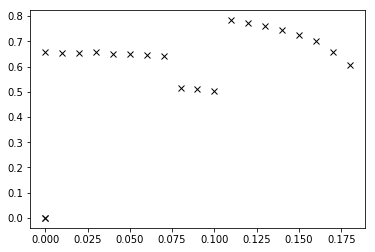

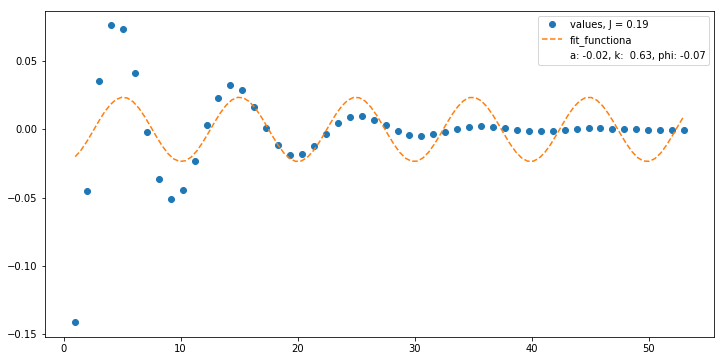

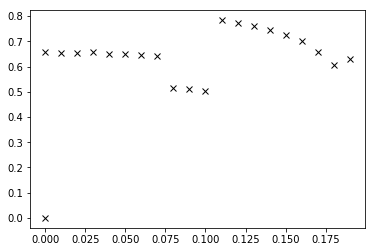

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [103]:
##Fit k for all J for L = 10

k_values = np.zeros((len(J),2))

for i,JJ in enumerate(J):
    
    if JJ<=0.07:
        k = 0.63
    if JJ>0.07:
        k = 0.53
    if JJ>0.1:
        k = 0.76

    a = np.amax(abs(fit_values[i])) 

    popta,pcov = optimize.curve_fit(fit_functionaa,np.linspace(1,53,52),fit_values[i],(-a,k,0))

    fig = plt.figure(figsize=(12,6))
    plt.plot(np.linspace(1,53,52),fit_values[i],'o',label='values, J = '+str(JJ))
    plt.plot(np.linspace(1,53,106),fit_functionaa(np.linspace(1,53,106),*popta),\
             '--',label='fit_functiona')
    plt.plot([],'w',label='a: %5.2f, k: %5.2f, phi: %5.2f' % tuple(popta))
    plt.legend()
    plt.show()

    k_values[i,0] = JJ
    k_values[i,1] = popta[1]
    
#     poptb,pcov = optimize.curve_fit(fit_functionb,np.linspace(1,53,52),fit_values[i],(0.23,0.83,4.04,0.44,0.63,4.77,10))
#     plt.plot(np.linspace(1,53,106),fit_functionb(np.linspace(1,53,106),*poptb),\
#              '--',label='fit_functionb')
#     plt.plot([],'w',label='a: %5.2f, k: %5.2f, phi: %5.2f, b: %5.2f, kprime: %5.2f, phiprime: %5.2f, d: %5.2f' % tuple(poptb))

#     if i<5:    
#         popt,pcov = optimize.curve_fit(fit_function,np.linspace(1,53,52),fit_values[i],(poptb))
#     else:
#         popt,pcov = optimize.curve_fit(fit_function,np.linspace(1,53,52),fit_values[i],(np.append(popta[0:3],poptb[3:7])))
#                                        #,bounds=([-10, -10, -10, -30, -10, -10, 0], [10, 10, 10, 10, 10, 10, 20]))
#     plt.plot(np.linspace(1,53,106),fit_function(np.linspace(1,53,106),*popt),\
#              '-.',label='fit_function')
#     plt.plot([],'w',label='a: %5.2f, k: %5.2f, phi: %5.2f, b: %5.2f, kprime: %5.2f, phiprime: %5.2f, d: %5.2f' % tuple(popt))

    plt.plot(k_values[:,0],k_values[:,1],'kx')
    plt.show()